In [16]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds

from tensorflow.keras import layers

In [17]:
print(tf.__version__)

2.7.0


In [18]:
(train_ds, val_ds, test_ds), metadata = tfds.load(
    "tf_flowers",
    split=["train[:80%]", "train[80%:90%]", "train[90%:]"],
    with_info=True,
    as_supervised=True,
)


In [19]:
num_classes = metadata.features["label"].num_classes
print(num_classes)


5


Text(0.5, 1.0, 'tulips')

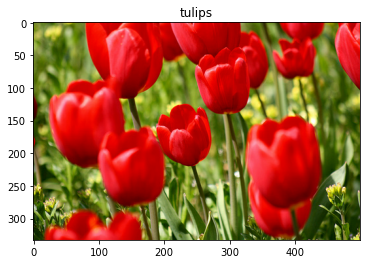

In [20]:
import os

os.environ["KMP_DUPLICATE_LIB_OK"] = "True"

get_label_name = metadata.features["label"].int2str

image, label = next(iter(train_ds))
plt.imshow(image)
plt.title(get_label_name(label))


In [21]:
import tensorflow.keras as keras

IMG_SIZE = 180


resize_and_rescale = keras.Sequential(
    [layers.Resizing(IMG_SIZE, IMG_SIZE), layers.Rescaling(1.0 / 255)]
)


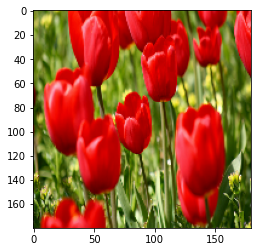

In [22]:
result = resize_and_rescale(image)
_ = plt.imshow(result)


In [23]:
print("Min and max pixel values:", result.numpy().min(), result.numpy().max())


Min and max pixel values: 0.0 1.0


In [24]:
data_augmentation = tf.keras.Sequential(
    [
        layers.RandomFlip("horizontal_and_vertical"),
        layers.RandomRotation(0.2),
    ]
)


In [25]:
image = tf.expand_dims(image, 0)


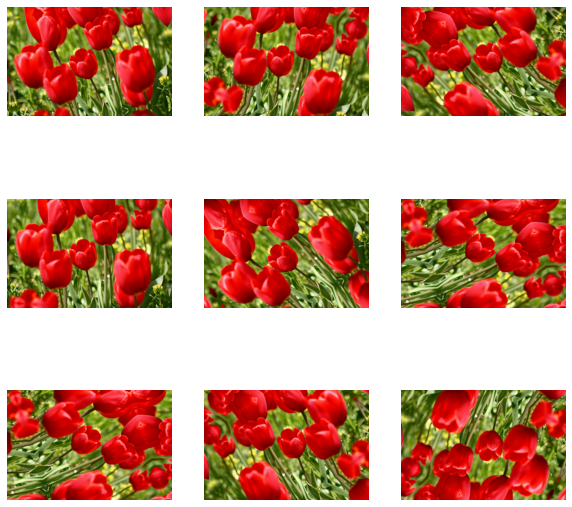

In [26]:
plt.figure(figsize=(10, 10))
for i in range(9):
    augmented_image = data_augmentation(image)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_image[0])
    plt.axis("off")
